In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:

# Quiz
Q = nx.Graph()
Q.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
Q.add_edges_from([
    ('A', 'B'),
    ('B', 'C'),
    ('C', 'D'),
    ('D', 'E'),
    ('E', 'F'),
    ('F', 'G'),
    ('G', 'H')
])
nx.clustering(Q)

In [19]:
# Assignment 1

# The questions that follow concern the file course_network_l2.adjlist available on Moodle. 
# The questions are meant to help you test whether you have setup the networkx (or similar) software library correctly.
# Each line in the file corresponds to one edge, in the format below.
# Node_u Node_v Weight 
# Each node corresponds to one course offered by the Computer Science Department. 
# There is an edge between two nodes only if the corresponding courses have overlapping topics1, 
# and the weight quantifies the number of topics that two courses have in common.
# Topics: as defined in the topic hierarchy of the ACM curriculum.



# 1.
# What is the maximum degree in the network?
# The degree of a node is calculated as the number of edges incident to the node, ignoring the weights.

G = nx.read_edgelist("../data/TutorialA/course_network_I2.adjlist", nodetype=str, data=(("weight", float),))
# All degrees
all_degrees = dict(G.degree())
print("All degrees:", all_degrees)

# Get node with max degree
max_deg_node = max(G, key=G.degree)
print("Max degree:", max_deg_node)

# Get degree of max node
all_degrees[max_deg_node]



All degrees: {'BSCS1001': 27, 'BSCS1002': 26, 'BSCS1006': 24, 'BSCS2011': 43, 'BSCS2015': 31, 'CSM131052': 55, 'CSM13109': 39, 'CSM14101': 25, 'CSM14121': 16, 'CSM14201': 14, 'CSM14204': 48, 'DATA12003': 39, 'DATA12004': 48, 'DATA16001': 55, 'TKT10002': 27, 'TKT10003': 26, 'TKT100031': 26, 'TKT10006': 24, 'TKT200011': 28, 'TKT20006': 28, 'TKT20013': 22, 'TKT20016': 24, 'TKT20018': 32, 'TKT20019': 22, 'TKT210241': 14, 'TKT210242': 14, 'TKT210243': 14, 'TKT21026': 31, 'DATA15003': 22, 'DATA20016': 37, 'TKT21004': 39, 'TKT21029': 6, 'TKT21030': 6, 'BSCS1005': 14, 'CSM12127': 32, 'CSM13107': 40, 'CSM14103': 14, 'CSM14302': 13, 'CSM14303': 17, 'CSM14305': 22, 'DATA14003': 50, 'TKT10004': 11, 'BSCS2002': 30, 'CSM12101': 26, 'CSM13001': 16, 'CSM13183': 9, 'DATA11008': 42, 'TKT20015': 30, 'TKT200151': 30, 'TKT200152': 30, 'TKT21039': 10, 'CSM13202': 8, 'DATA11001': 28, 'DATA11002': 29, 'DATA12001': 28, 'DATA15001': 29, 'DATA20019': 34, 'DATA20045': 24, 'DATA20046': 32, 'DATA20056': 25, 'CSM121

55

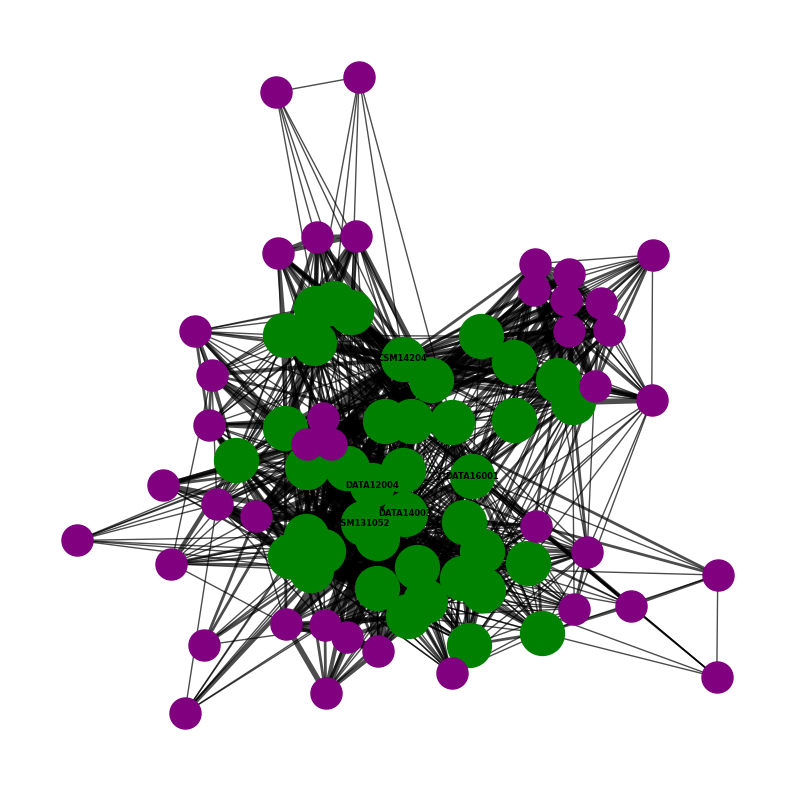

In [ ]:
# 2.

# Plot the course network using a layout of your choice, so that:
# 1. Nodes with degree higher than average appear with larger node size than the rest.
# 2. Edges with higher weight appear with thicker linewidth.
# 3. Five nodes with the largest degrees (top-5 degrees) appear with the course code as label, 
# while other nodes appear without labels.
# Attach the plot as an image file and provide a brief description of the plot in the text box.

pos_fr = nx.spring_layout(G)
pos_fr

avg_deg = sum(dict(G.degree()).values()) / G.number_of_nodes()
above_avg = [n for n, d in G.degree() if d > avg_deg]
not_above_avg = [n for n, d in G.degree() if d <= avg_deg]
deg = list(G.degree())
deg_sorted = sorted(deg, key=lambda x: x[1], reverse=True)
top_five = deg_sorted[:5]

edge_widths = [ G[u][v]["weight"] for u, v in G.edges() ]
top5_nodes = {n for n, d in top_five}
labels = { n: (n if n in top5_nodes else "") for n in G.nodes() }

fig, ax = plt.subplots(1,1, figsize=(10,10))
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=above_avg, node_size=1000, node_color='green', ax=ax)
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=not_above_avg, node_size=500, node_color='purple', ax=ax)
nx.draw_networkx_edges( G, pos=pos_fr, width=edge_widths, alpha=0.7, ax=ax ) 
nx.draw_networkx_labels( G, pos=pos_fr, labels=labels, font_size=6, font_weight="bold", ax=ax )


ax.set_axis_off()
plt.savefig("../data/TutorialA/ex1_q2_plot.png", dpi=300, bbox_inches="tight")